# Demonstrating SigLearn

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn; seaborn.set()

from sklearn.linear_model import LinearRegression as skLinearRegression
from siglearn.linear_model import LinearRegression

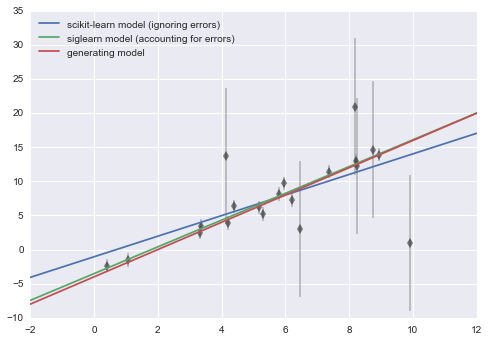

In [2]:
# Generate Data
rng = np.random.RandomState(6)
N = 20
x = 10 * rng.rand(N)
dy = np.ones(N)
dy[-6:] = 10
y = 2 * x - 4 + dy * rng.randn(N)

# Fit the scikit-learn model
model1 = skLinearRegression(fit_intercept=True)
model1.fit(x[:, None], y)

# Fit the siglearn model
model2 = LinearRegression(fit_intercept=True)
model2.fit(x[:, None], y, dy)

# Compute the predicted results
xfit = np.linspace(-2, 12)
yfit1 = model1.predict(xfit[:, None])
yfit2 = model2.predict(xfit[:, None])

# Plot data and fits
plt.errorbar(x, y, dy, fmt='dk', ecolor='gray', alpha=0.5);
plt.plot(xfit, yfit1, label='scikit-learn model (ignoring errors)');
plt.plot(xfit, yfit2, label='siglearn model (accounting for errors)');
plt.plot(xfit, 2 * xfit - 4, label='generating model')
plt.legend(loc='upper left');